In [171]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [172]:
data = pd.read_csv('./insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [174]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### There are no missing values as such

In [175]:
data['region'].value_counts().sort_values()

northeast    324
southwest    325
northwest    325
southeast    364
Name: region, dtype: int64

In [176]:
data['children'].value_counts().sort_values()

5     18
4     25
3    157
2    240
1    324
0    574
Name: children, dtype: int64

### Converting Categorical Features to Numerical

In [177]:
clean_data = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1},
                   'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
               }
data_copy = data.copy()
data_copy.replace(clean_data, inplace=True)

In [178]:
data_copy.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.514948,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.105572,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


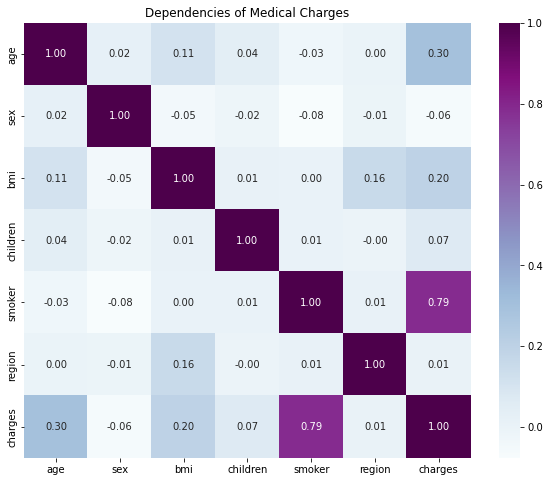

In [179]:
corr = data_copy.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap='BuPu',annot=True,fmt=".2f",ax=ax)
plt.title("Dependencies of Medical Charges")

plt.show()

### Smoker, BMI and Age are most important factor that determnines - Charges
Also we see that Sex, Children and Region do not affect the Charges.
We might drop these 3 columns as they have less correlation

In [180]:
print(data['sex'].value_counts().sort_values()) 
print(data['smoker'].value_counts().sort_values())
print(data['region'].value_counts().sort_values())

female    662
male      676
Name: sex, dtype: int64
yes     274
no     1064
Name: smoker, dtype: int64
northeast    324
southwest    325
northwest    325
southeast    364
Name: region, dtype: int64


### Now we are confirmed that there are no other values in above pre-preocessed column, We can proceed with EDA

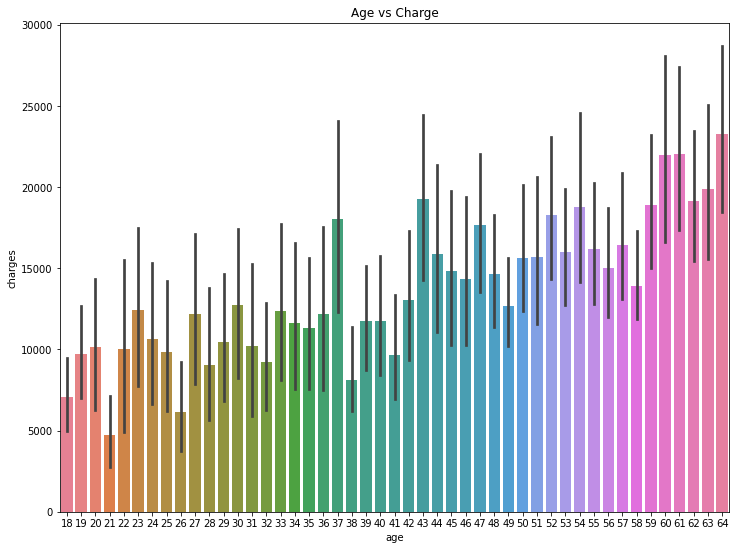

In [181]:
plt.figure(figsize=(12,9))
plt.title('Age vs Charge')
sns.barplot(x='age',y='charges',data=data_copy,palette='husl')
plt.show()

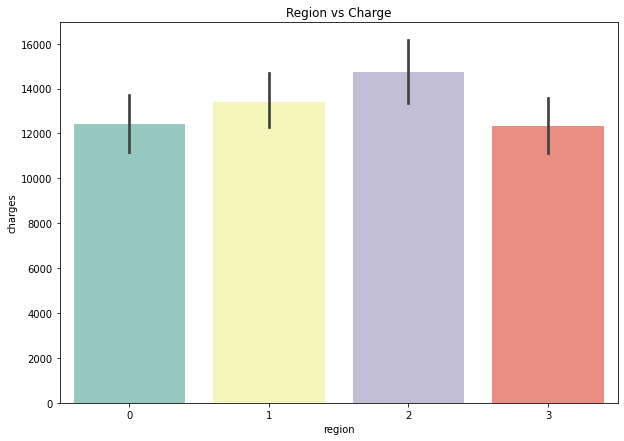

In [182]:
plt.figure(figsize=(10,7))
plt.title('Region vs Charge')
sns.barplot(x='region',y='charges',data=data_copy,palette='Set3')

Text(0.5, 1.0, 'BMI VS Charge')

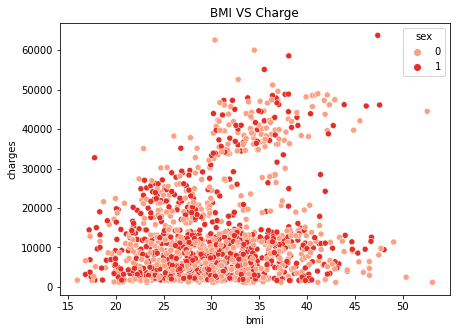

In [183]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='bmi',y='charges',hue='sex',data=data_copy,palette='Reds')
plt.title('BMI VS Charge')

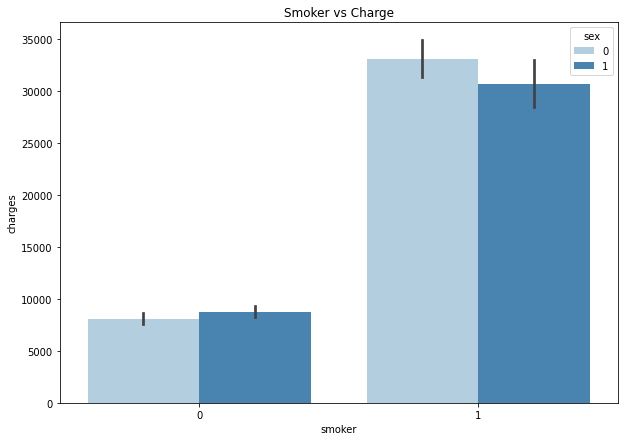

In [184]:
plt.figure(figsize=(10,7))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=data_copy,palette='Blues',hue='sex')

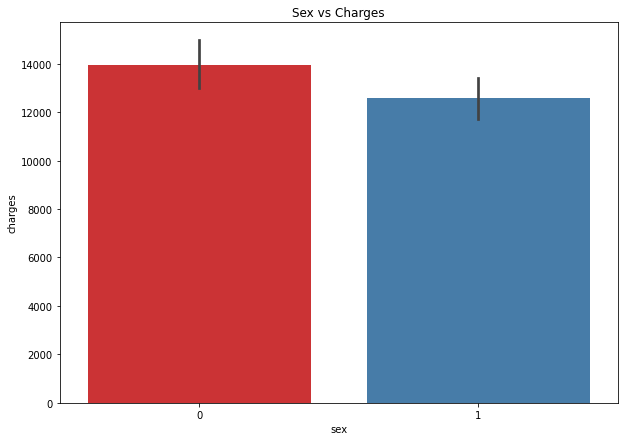

In [185]:
plt.figure(figsize=(10,7))
plt.title('Sex vs Charges')
sns.barplot(x='sex',y='charges',data=data_copy,palette='Set1')

Text(0, 0.5, 'Count')

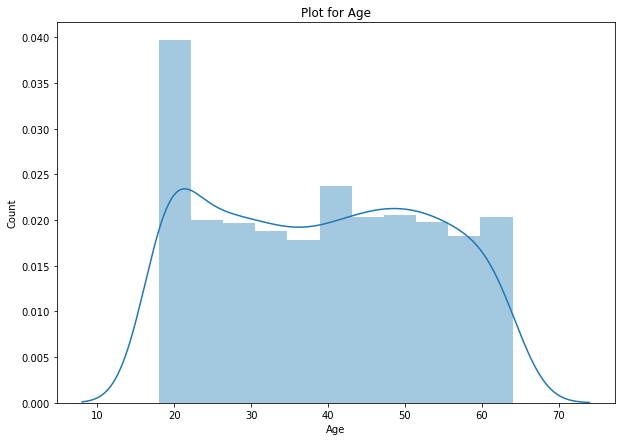

In [186]:
plt.figure(figsize=(10,7))
sns.distplot(data_copy['age'])
plt.title('Plot for Age')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

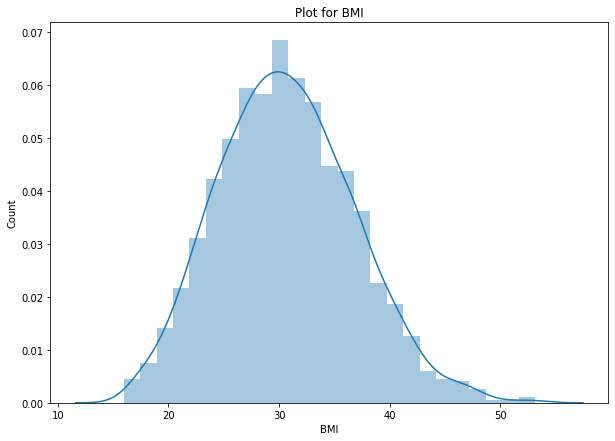

In [187]:
plt.figure(figsize=(10,7))
sns.distplot(data_copy['bmi'])
plt.title('Plot for BMI')
plt.xlabel('BMI')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

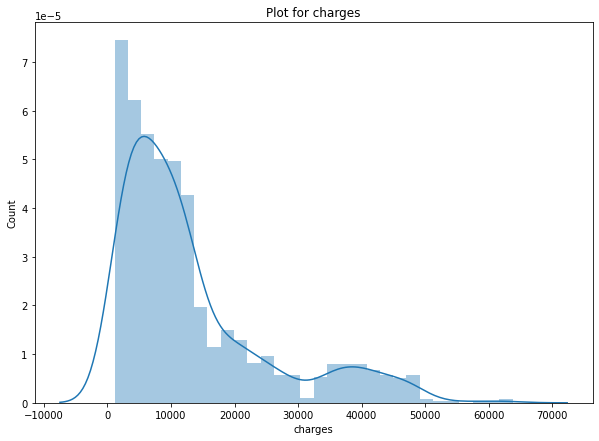

In [188]:
plt.figure(figsize=(10,7))
sns.distplot(data_copy['charges'])
plt.title('Plot for charges')
plt.xlabel('charges')
plt.ylabel('Count')

### There might be few outliers in Charges but then we cannot say that the value is an outlier as there might be cases in which Charge for medical was very les actually!

### Prepating data - We can scale BMI and Charges Column before proceeding with Prediction

In [189]:
from sklearn.preprocessing import StandardScaler
data_pre = data_copy.copy()

tempBmi = data_pre.bmi
tempBmi = tempBmi.values.reshape(-1,1)
data_pre['bmi'] = StandardScaler().fit_transform(tempBmi)

tempAge = data_pre.age
tempAge = tempAge.values.reshape(-1,1)
data_pre['age'] = StandardScaler().fit_transform(tempAge)

tempCharges = data_pre.charges
tempCharges = tempCharges.values.reshape(-1,1)
data_pre['charges'] = StandardScaler().fit_transform(tempCharges)

data_pre.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,1,-0.453320,0,1,3,0.298584
1,-1.509965,0,0.509621,1,0,2,-0.953689
2,-0.797954,0,0.383307,3,0,2,-0.728675
3,-0.441948,0,-1.305531,0,0,0,0.719843
4,-0.513149,0,-0.292556,0,0,0,-0.776802


Normal Equation

In [190]:
D2 = pd.DataFrame(data_pre, columns=['age','sex','bmi','children','smoker','region','charges'])
D2.insert(2,"smoker_age",D2['smoker']*D2['age'])
D2.insert(3,"smoker^2",D2['smoker']**2)
D2.insert(4,"age^2",D2['age']**2)
D2.drop(columns=['sex','bmi','children','region'],axis=1)
D2.head().columns

Index(['age', 'sex', 'smoker_age', 'smoker^2', 'age^2', 'bmi', 'children',
       'smoker', 'region', 'charges'],
      dtype='object')

In [191]:
test_sizeD2 = 250
test_D2 = D2.iloc[-test_sizeD2:]
train_D2 = D2.iloc[:-test_sizeD2]
train_data = np.asarray(train_D2)
test_data = np.asarray(test_D2)
X = train_data[:,:-1] 
r = train_data[:,-1:] 
test_X = test_data[:,:-1]
test_r = test_data[:,-1:]
ones = np.ones((len(X),1))
D2mat = np.hstack((ones,X))
ones = np.ones((len(test_X),1))
test_D2mat = np.hstack((ones,test_X))

In [192]:
class LR_Norm_Eqn:
  def __init__(self,m):
    self.weights = np.zeros([m,1])
  def predict(self, D, R): 
    temp = np.dot(D, self.weights)
    return temp
  def measure(self, predicted, actual): 
    temp = predicted- actual
    m = len(predicted) 
    return (np.sum(np.power(temp, 2))) / (m)
  def fit(self,D,R):
    D_transpose = np.transpose(D)
    D_trans_dot_D_Inv = np.linalg.inv(D_transpose.dot(D))
    D_trans_R = D_transpose.dot(R)
    self.weights = D_trans_dot_D_Inv.dot(D_trans_R)
    return self.weights

In [193]:
length = D2mat.shape[1]
lin = LR_Norm_Eqn(length)


In [194]:
predicted = lin.predict(D2mat,r)
test_predicted = lin.predict(test_D2,test_r)
print("Error with train data: ",lin.measure(predicted,r))
print("Error with test data: ",lin.measure(test_predicted,test_r))

Error with train data:  0.982172236945884
Error with test data:  1.0775864248115123


Degree 3

In [195]:
D3 = data_pre.copy()
D3.insert(2,"smoker_age",D3['smoker']*D3['age'])
D3.insert(3,"smoker^2",D3['smoker']**2)
D3.insert(4,"age^2",D3['age']**2)
D3.insert(5,"smoker^2_age",D3['smoker^2']*D3['age'])
D3.insert(6,"smoker_age^2",D3['smoker']*D3['age^2'])
D3.insert(7,"smoker^2_age^2",D3['smoker^2']*D3['age^2'])
D3.insert(8,"smoker^3",D3['smoker']**3)
D3.insert(9,"age^3",D3['age']**3)
D3.head().columns

Index(['age', 'sex', 'smoker_age', 'smoker^2', 'age^2', 'smoker^2_age',
       'smoker_age^2', 'smoker^2_age^2', 'smoker^3', 'age^3', 'bmi',
       'children', 'smoker', 'region', 'charges'],
      dtype='object')

In [196]:
test_size = 200
test3 = D3.iloc[-test_size:]
train3 = D3.iloc[:-test_size]
train_data3 = np.asarray(train3)
test_data3 = np.asarray(test3)
X3 = train_data3[:,:-1] 
r3 = train_data3[:,-1:] 
test_X3 = test_data3[:,:-1]
test_r3 = test_data3[:,-1:]
ones3 = np.ones((len(X3),1))
Dmat3 = np.hstack((ones3,X3))
ones3 = np.ones((len(test_X3),1))
test_Dmat3 = np.hstack((ones3,test_X3))

In [197]:
length3 = Dmat3.shape[1]
lin = LR_Norm_Eqn(length3)


In [198]:
predicted3 = lin.predict(Dmat3,r3)
test_predicted3= lin.predict(test_Dmat3,test_r3)
print("Error with train data: ",lin.measure(predicted3,r3))
print("Error eith test data: ",lin.measure(test_predicted3,test_r3))

Error with train data:  0.9891506087244979
Error eith test data:  1.0617330363576059


## Importing Libraries

In [199]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import xgboost as xgb

from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

## Linear Regression

In [200]:
X = data_pre.drop('charges',axis=1).values
y = data_pre['charges'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (1070, 6)
Size of y_train :  (1070, 1)
Size of X_test :  (268, 6)
Size of Y_test :  (268, 1)


In [201]:
%%time
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

CPU times: user 1.49 ms, sys: 40 µs, total: 1.53 ms
Wall time: 1.44 ms


In [202]:


y_pred_linear_reg_train = linear_reg.predict(X_train)
r2_score_linear_reg_train = r2_score(y_train, y_pred_linear_reg_train)

y_pred_linear_reg_test = linear_reg.predict(X_test)
r2_score_linear_reg_test = r2_score(y_test, y_pred_linear_reg_test)

rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_reg_test)))


print('R2_score (train) : {0:.3f}'.format(r2_score_linear_reg_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_linear_reg_test))
print('RMSE : {0:.3f}'.format(rmse_linear))

R2_score (train) : 0.741
R2_score (test) : 0.783
RMSE : 0.480


## Random Forest

In [203]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 50).fit(X_train, y_train)

rfr_train_pred = rfr.predict(X_train)
rfr_test_pred = rfr.predict(X_test)


rfr_train_mse = mean_squared_error(y_train,rfr_train_pred)
rfr_test_mse = mean_squared_error(y_test,rfr_test_pred)


print('MSE train data: {:.4}, MSE test data: {:.4}'.format(rfr_train_mse, rfr_test_mse))

print('RMSE train data: {:.4}, RMSE test data: {:.4}'.format(
    np.sqrt(np.absolute(rfr_train_mse)), 
    np.sqrt(np.absolute(rfr_train_mse))))
                                                               
print('R2 train data: {:.4}, R2 test data: {:.4}'.format(
    r2_score(y_train, rfr_train_pred),
    r2_score(y_test, rfr_test_pred)))

MSE train data: 0.02541, MSE test data: 0.1437
RMSE train data: 0.1594, RMSE test data: 0.1594
R2 train data: 0.9742, R2 test data: 0.8643


Increasing number of estimators

In [204]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 100).fit(X_train, y_train)

rfr_train_pred = rfr.predict(X_train)
rfr_test_pred = rfr.predict(X_test)


rfr_train_mse = mean_squared_error(y_train,rfr_train_pred)
rfr_test_mse = mean_squared_error(y_test,rfr_test_pred)


print('MSE train data: {:.4}, MSE test data: {:.4}'.format(rfr_train_mse, rfr_test_mse))

print('RMSE train data: {:.4}, RMSE test data: {:.4}'.format(
    np.sqrt(np.absolute(rfr_train_mse)), 
    np.sqrt(np.absolute(rfr_train_mse))))
                                                               
print('R2 train data: {:.4}, R2 test data: {:.4}'.format(
    r2_score(y_train, rfr_train_pred),
    r2_score(y_test, rfr_test_pred)))

MSE train data: 0.02417, MSE test data: 0.142
RMSE train data: 0.1555, RMSE test data: 0.1555
R2 train data: 0.9755, R2 test data: 0.866


In [205]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 250).fit(X_train, y_train)

rfr_train_pred = rfr.predict(X_train)
rfr_test_pred = rfr.predict(X_test)


rfr_train_mse = mean_squared_error(y_train,rfr_train_pred)
rfr_test_mse = mean_squared_error(y_test,rfr_test_pred)


print('MSE train data: {:.4}, MSE test data: {:.4}'.format(rfr_train_mse, rfr_test_mse))

print('RMSE train data: {:.4}, RMSE test data: {:.4}'.format(
    np.sqrt(np.absolute(rfr_train_mse)), 
    np.sqrt(np.absolute(rfr_train_mse))))
                                                               
print('R2 train data: {:.4}, R2 test data: {:.4}'.format(
    r2_score(y_train, rfr_train_pred),
    r2_score(y_test, rfr_test_pred)))

MSE train data: 0.0237, MSE test data: 0.1416
RMSE train data: 0.1539, RMSE test data: 0.1539
R2 train data: 0.9759, R2 test data: 0.8663


In [206]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 550).fit(X_train, y_train)

rfr_train_pred = rfr.predict(X_train)
rfr_test_pred = rfr.predict(X_test)


rfr_train_mse = mean_squared_error(y_train,rfr_train_pred)
rfr_test_mse = mean_squared_error(y_test,rfr_test_pred)


print('MSE train data: {:.4}, MSE test data: {:.4}'.format(rfr_train_mse, rfr_test_mse))

print('RMSE train data: {:.4}, RMSE test data: {:.4}'.format(
    np.sqrt(np.absolute(rfr_train_mse)), 
    np.sqrt(np.absolute(rfr_train_mse))))
                                                               
print('R2 train data: {:.4}, R2 test data: {:.4}'.format(
    r2_score(y_train, rfr_train_pred),
    r2_score(y_test, rfr_test_pred)))

MSE train data: 0.02375, MSE test data: 0.1421
RMSE train data: 0.1541, RMSE test data: 0.1541
R2 train data: 0.9759, R2 test data: 0.8658


In [207]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 850).fit(X_train, y_train)

rfr_train_pred = rfr.predict(X_train)
rfr_test_pred = rfr.predict(X_test)


rfr_train_mse = mean_squared_error(y_train,rfr_train_pred)
rfr_test_mse = mean_squared_error(y_test,rfr_test_pred)


print('MSE train data: {:.4}, MSE test data: {:.4}'.format(rfr_train_mse, rfr_test_mse))

print('RMSE train data: {:.4}, RMSE test data: {:.4}'.format(
    np.sqrt(np.absolute(rfr_train_mse)), 
    np.sqrt(np.absolute(rfr_train_mse))))
                                                               
print('R2 train data: {:.4}, R2 test data: {:.4}'.format(
    r2_score(y_train, rfr_train_pred),
    r2_score(y_test, rfr_test_pred)))

MSE train data: 0.02377, MSE test data: 0.1402
RMSE train data: 0.1542, RMSE test data: 0.1542
R2 train data: 0.9759, R2 test data: 0.8677


We can see that now the R^2 values of test data decreases as we have increased the number of estimators


MSE error is getting reduced as we are increasing the number of estimators.

## Ridge Regressor

In [208]:
X_c = data_copy.drop('charges',axis=1).values
y_c = data_copy['charges'].values.reshape(-1,1)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c,y_c,test_size=0.2, random_state=42)

X_train_scaled = StandardScaler().fit_transform(X_train_c)
y_train_scaled = StandardScaler().fit_transform(y_train_c)
X_test_scaled = StandardScaler().fit_transform(X_test_c)
y_test_scaled = StandardScaler().fit_transform(y_test_c)

In [209]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

steps = [ ('scalar', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2)),
        ('model', Ridge())]

ridge_pipe = Pipeline(steps)

In [210]:
parameters = { 'model__alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2,1,2,5,10,20,25,35, 43,55,100], 'model__random_state' : [42]}
reg_ridge = GridSearchCV(ridge_pipe, parameters, cv=10)
reg_ridge = reg_ridge.fit(X_train, y_train.ravel())

In [211]:
reg_ridge.best_estimator_, reg_ridge.best_score_

(Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                 ('model', Ridge(alpha=20, random_state=42))]),
 0.8259990140429396)

In [212]:
ridge = Ridge(alpha=20, random_state=42)
ridge.fit(X_train_scaled, y_train_scaled.ravel())


y_pred_ridge_train = ridge.predict(X_train_scaled)
r2_score_ridge_train = r2_score(y_train_scaled, y_pred_ridge_train)

y_pred_ridge_test = ridge.predict(X_test_scaled)
r2_score_ridge_test = r2_score(y_test_scaled, y_pred_ridge_test)

rmse_ridge = (np.sqrt(mean_squared_error(y_test_scaled, y_pred_linear_reg_test)))
print('R2 score (train) : {0:.5f}'.format(r2_score_ridge_train))
print('R2 score (test) : {0:.5f}'.format(r2_score_ridge_test))
print('RMSE : {0:.5f}'.format(rmse_ridge))

R2 score (train) : 0.74115
R2 score (test) : 0.78380
RMSE : 0.46521


Changing the aplha value

In [213]:
ridge = Ridge(alpha=35, random_state=42)
ridge.fit(X_train_scaled, y_train_scaled.ravel())


y_pred_ridge_train = ridge.predict(X_train_scaled)
r2_score_ridge_train = r2_score(y_train_scaled, y_pred_ridge_train)

y_pred_ridge_test = ridge.predict(X_test_scaled)
r2_score_ridge_test = r2_score(y_test_scaled, y_pred_ridge_test)

rmse_ridge = (np.sqrt(mean_squared_error(y_test_scaled, y_pred_linear_reg_test)))
print('R2 score (train) : {0:.5f}'.format(r2_score_ridge_train))
print('R2 score (test) : {0:.5f}'.format(r2_score_ridge_test))
print('RMSE : {0:.5f}'.format(rmse_ridge))

R2 score (train) : 0.74064
R2 score (test) : 0.78351
RMSE : 0.46521


In [214]:
ridge = Ridge(alpha=10, random_state=42)
ridge.fit(X_train_scaled, y_train_scaled.ravel())


y_pred_ridge_train = ridge.predict(X_train_scaled)
r2_score_ridge_train = r2_score(y_train_scaled, y_pred_ridge_train)

y_pred_ridge_test = ridge.predict(X_test_scaled)
r2_score_ridge_test = r2_score(y_test_scaled, y_pred_ridge_test)

rmse_ridge = (np.sqrt(mean_squared_error(y_test_scaled, y_pred_linear_reg_test)))
print('R2 score (train) : {0:.5f}'.format(r2_score_ridge_train))
print('R2 score (test) : {0:.5f}'.format(r2_score_ridge_test))
print('RMSE : {0:.5f}'.format(rmse_ridge))

R2 score (train) : 0.74134
R2 score (test) : 0.78383
RMSE : 0.46521


##Training Data without Scaling for RandomClassifie

In [215]:
data_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520


In [216]:
X_ = data_copy.drop('charges',axis=1).values
y_ = data_copy['charges'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_,y_,test_size=0.2, random_state=42)

print('Size of X_train_ : ', X_train_.shape)
print('Size of y_train_ : ', y_train_.shape)
print('Size of X_test_ : ', X_test_.shape)
print('Size of Y_test_ : ', y_test_.shape)

Size of X_train_ :  (1070, 6)
Size of y_train_ :  (1070, 1)
Size of X_test_ :  (268, 6)
Size of Y_test_ :  (268, 1)


In [217]:
rf_reg = RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                       n_estimators=1200)
rf_reg.fit(X_train_, y_train_.ravel())

RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                      n_estimators=1200)

In [218]:
y_pred_rf_train_ = rf_reg.predict(X_train_)
r2_score_rf_train_ = r2_score(y_train_, y_pred_rf_train_)

y_pred_rf_test_ = rf_reg.predict(X_test_)
r2_score_rf_test_ = r2_score(y_test_, y_pred_rf_test_)

print('R2 score (train) : {0:.3f}'.format(r2_score_rf_train_))
print('R2 score (test) : {0:.3f}'.format(r2_score_rf_test_))

R2 score (train) : 0.884
R2 score (test) : 0.878


## Support Vector Regression

In [219]:
X_c = data_copy.drop('charges',axis=1).values
y_c = data_copy['charges'].values.reshape(-1,1)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c,y_c,test_size=0.2, random_state=42)

X_train_scaled = StandardScaler().fit_transform(X_train_c)
y_train_scaled = StandardScaler().fit_transform(y_train_c)
X_test_scaled = StandardScaler().fit_transform(X_test_c)
y_test_scaled = StandardScaler().fit_transform(y_test_c)

svr = SVR()

In [220]:
svr = SVR(C=10, gamma=0.1, tol=0.0001)
svr.fit(X_train_scaled, y_train_scaled.ravel())

SVR(C=10, gamma=0.1, tol=0.0001)

In [221]:
y_pred_svr_train = svr.predict(X_train_scaled)
r2_score_svr_train = r2_score(y_train_scaled, y_pred_svr_train)

y_pred_svr_test = svr.predict(X_test_scaled)
r2_score_svr_test = r2_score(y_test_scaled, y_pred_svr_test)

rmse_svr = (np.sqrt(mean_squared_error(y_test_scaled, y_pred_svr_test)))

print('R2_score (train) : {0:.3f}'.format(r2_score_svr_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_svr_test))
print('RMSE : {0:.3f}'.format(rmse_svr))

R2_score (train) : 0.857
R2 score (test) : 0.871
RMSE : 0.359


In [222]:
svr = SVR(C=50, gamma=0.1, tol=0.0001)
svr.fit(X_train_scaled, y_train_scaled.ravel())

SVR(C=50, gamma=0.1, tol=0.0001)

In [223]:
y_pred_svr_train = svr.predict(X_train_scaled)
r2_score_svr_train = r2_score(y_train_scaled, y_pred_svr_train)

y_pred_svr_test = svr.predict(X_test_scaled)
r2_score_svr_test = r2_score(y_test_scaled, y_pred_svr_test)

rmse_svr = (np.sqrt(mean_squared_error(y_test_scaled, y_pred_svr_test)))

print('R2_score (train) : {0:.3f}'.format(r2_score_svr_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_svr_test))
print('RMSE : {0:.3f}'.format(rmse_svr))

R2_score (train) : 0.866
R2 score (test) : 0.868
RMSE : 0.364


In [224]:
svr = SVR(C=50, gamma=0.6, tol=0.0001)
svr.fit(X_train_scaled, y_train_scaled.ravel())

SVR(C=50, gamma=0.6, tol=0.0001)

In [225]:
y_pred_svr_train = svr.predict(X_train_scaled)
r2_score_svr_train = r2_score(y_train_scaled, y_pred_svr_train)

y_pred_svr_test = svr.predict(X_test_scaled)
r2_score_svr_test = r2_score(y_test_scaled, y_pred_svr_test)

rmse_svr = (np.sqrt(mean_squared_error(y_test_scaled, y_pred_svr_test)))

print('R2_score (train) : {0:.3f}'.format(r2_score_svr_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_svr_test))
print('RMSE : {0:.3f}'.format(rmse_svr))

R2_score (train) : 0.943
R2 score (test) : 0.694
RMSE : 0.553
